# All imports 

In [1]:
import pyforest
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## Ignore warnings 

In [30]:
import warnings
warnings.filterwarnings('ignore')

# Read files

In [31]:
df=pd.read_csv("E:\crome downloades\Excelr/forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Data Exploration

In [32]:
X=df.iloc[:,:-1]

In [33]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
X=X.apply(LabelEncoder().fit_transform)
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,0,1,0,0,0,0
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.decomposition import PCA

In [37]:
pca=PCA()
pca_data=pca.fit_transform(X)

In [38]:
data=pd.DataFrame(pca_data)

In [39]:
data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,160.151815,30.982812,24.286862,14.052338,-4.561254,-4.852748,-4.942710,3.672264,2.956266,-1.984793,...,-0.044031,0.014967,-0.047585,-0.020424,-0.003492,-0.008446,2.593800e-13,-1.348449e-14,2.213812e-15,-2.473173e-15
1,69.492495,-29.512021,27.615471,-55.865965,19.664966,-5.395033,2.864041,-5.359999,-3.093115,2.356356,...,0.304217,0.079835,0.135791,-0.045869,-0.016053,-0.029329,6.557254e-15,6.973293e-14,9.991980e-14,-5.599098e-14
2,69.627737,-29.325654,54.124001,-39.939109,27.077076,-14.119192,0.369330,-4.779051,-3.709814,-0.617742,...,0.309075,0.017659,0.059039,-0.049030,-0.018502,-0.018689,6.293644e-15,1.104030e-14,-1.952979e-14,-6.072300e-16
3,148.924412,21.983344,5.054574,46.449418,29.501324,21.874933,24.769431,-1.657825,3.230757,-2.067947,...,-0.033802,0.083062,0.177823,-0.035090,-0.034960,0.026157,9.285305e-15,2.114758e-14,6.813020e-15,1.889696e-14
4,129.773191,9.511950,5.161587,42.607013,14.648878,33.527975,6.579204,-8.059364,3.197391,1.003173,...,-0.119383,0.190938,0.280911,-0.007001,-0.053164,0.030892,-2.436830e-15,3.544376e-14,-3.550805e-15,1.675494e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-26.079057,55.906822,-11.279572,-100.474329,-55.422393,22.635535,-15.114471,0.424536,-5.777096,-0.328939,...,-0.083249,-0.128937,-0.102878,-0.015554,-0.028002,-0.016561,-1.194372e-15,-1.746828e-15,-2.242618e-15,-1.905192e-16
513,-66.908982,154.633336,26.464382,-63.823267,-42.953025,43.030294,-0.915088,6.504886,-3.881775,0.214339,...,-0.065299,-0.087682,-0.096728,-0.034358,-0.033416,-0.000530,-2.388004e-15,3.170789e-16,-2.839060e-15,-1.109865e-14
514,-30.727314,105.479135,31.347244,-60.672929,-42.128294,39.951866,-2.138762,8.536539,-3.450999,0.321766,...,-0.059431,-0.093877,-0.110783,-0.031728,-0.030588,-0.004053,-2.800875e-15,6.282781e-15,-4.879079e-15,-6.962159e-15
515,-14.513248,-86.565993,-57.134312,8.289198,-9.198992,3.940663,9.492508,1.939120,-0.942945,-1.415637,...,0.081025,-0.001640,0.112245,-0.020839,-0.011072,0.013468,2.273911e-15,2.310721e-15,-4.730680e-16,-3.657882e-15


In [40]:
pca.explained_variance_

array([7.00233575e+03, 6.19532354e+03, 1.87161422e+03, 1.06670193e+03,
       5.90454089e+02, 1.43197982e+02, 8.50117100e+01, 1.37145207e+01,
       9.88469101e+00, 3.62002107e+00, 1.87201191e-01, 1.67593852e-01,
       1.50626978e-01, 1.42769741e-01, 1.11244546e-01, 1.10343894e-01,
       7.55986558e-02, 6.22536690e-02, 4.28434952e-02, 2.97698875e-02,
       1.99118050e-02, 1.80802143e-02, 1.28787773e-02, 4.23964782e-03,
       3.90194000e-03, 2.13002115e-03, 1.37507839e-28, 4.81526741e-29,
       4.81526741e-29, 4.81526741e-29])

In [41]:
ratio=pca.explained_variance_ratio_
ratio

array([4.12314421e-01, 3.64795595e-01, 1.10205160e-01, 6.28099828e-02,
       3.47673612e-02, 8.43184263e-03, 5.00569457e-03, 8.07544061e-04,
       5.82034452e-04, 2.13155573e-04, 1.10228577e-05, 9.86833028e-06,
       8.86927983e-06, 8.40662679e-06, 6.55034722e-06, 6.49731466e-06,
       4.45143122e-06, 3.66564621e-06, 2.52272835e-06, 1.75292279e-06,
       1.17245511e-06, 1.06460663e-06, 7.58333476e-07, 2.49640691e-07,
       2.29755640e-07, 1.25420784e-07, 8.09679326e-33, 2.83534561e-33,
       2.83534561e-33, 2.83534561e-33])

<BarContainer object of 30 artists>

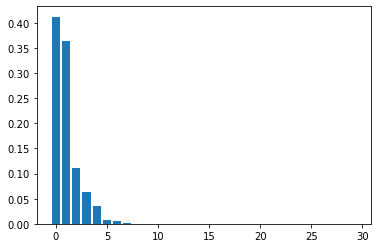

In [42]:
plt.bar(range(len(ratio)),ratio)


In [43]:
new_data=data.iloc[:,:6]

In [44]:
new_data=new_data.rename(columns={0:'pca1',1:'pca2',2:'pca3',3:'pca4',4:'pca5',5:'pca6'})
new_data

,pca1,pca2,pca3,pca4,pca5,pca6
0,160.151815,30.982812,24.286862,14.052338,-4.561254,-4.852748
1,69.492495,-29.512021,27.615471,-55.865965,19.664966,-5.395033
2,69.627737,-29.325654,54.124001,-39.939109,27.077076,-14.119192
3,148.924412,21.983344,5.054574,46.449418,29.501324,21.874933
4,129.773191,9.511950,5.161587,42.607013,14.648878,33.527975
...,...,...,...,...,...,...
512,-26.079057,55.906822,-11.279572,-100.474329,-55.422393,22.635535
513,-66.908982,154.633336,26.464382,-63.823267,-42.953025,43.030294
514,-30.727314,105.479135,31.347244,-60.672929,-42.128294,39.951866
515,-14.513248,-86.565993,-57.134312,8.289198,-9.198992,3.940663


In [45]:
x=new_data

In [46]:
y=df['size_category']

In [47]:
x.shape,y.shape

((517, 6), (517,))

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [49]:
model=SVC()
parameters=({'C':[1,15,14,13,12,11,10,0.1],
    'kernel':['rbf','polynomial'],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001]})

In [50]:
grid=GridSearchCV(model,parameters,cv=10)

In [51]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                         'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'polynomial']})

In [52]:
grid.best_score_

0.9888888888888887

In [53]:
grid.best_params_

{'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}

In [54]:
final_model=SVC(C=1,gamma=0.0001,kernel='rbf')

In [55]:
final_model.fit(x_train,y_train)

SVC(C=1, gamma=0.0001)

In [56]:
y_test_pred=final_model.predict(x_test)

In [57]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

       large       0.95      1.00      0.97        37
       small       1.00      0.98      0.99       119

    accuracy                           0.99       156
   macro avg       0.97      0.99      0.98       156
weighted avg       0.99      0.99      0.99       156



# thankyou 